### Importaciones y lecturas

In [30]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

df_clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_clientes_malos.csv')
df_clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_clientes_regulares.csv')
df_clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_clientes_vip.csv')

In [3]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((96, 18), (12258, 18), (8803, 18))

### Limpieza data frame clientes malo, regular y vip

In [4]:
df_clientes_malos

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
4,5065316,F,N,Y,1,157500.0,State servant,Higher education,Married,House / apartment,42.86,11.73,1,0,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5058531,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
92,5117794,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,Core staff,4.0
93,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
94,5137206,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,Drivers,1.0


### Correlación

#### Primer correlación

In [5]:
# Se elimina ID en la correlacion para evitar valores incongruentes 

# dfAll_m = dfAll_m.dropna()

df_clientes_malos = df_clientes_malos.drop(['ID'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID'], axis = 1)

# Se eliminan valores vacíos en 

df_clientes_malos = df_clientes_malos.dropna()
df_clientes_regulares = df_clientes_regulares.dropna()
df_clientes_vip = df_clientes_vip.dropna()

df_clientes_malos_str = df_clientes_malos
df_clientes_regulares_str = df_clientes_regulares
df_clientes_vip_str = df_clientes_vip

In [6]:
df_clientes_malos

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
4,F,N,Y,1,157500.0,State servant,Higher education,Married,House / apartment,42.86,11.73,1,0,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
92,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,Core staff,4.0
93,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
94,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,Drivers,1.0


In [7]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [8]:
s_clientes_malos

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,NaN,0.184868,0.368375,0.044766,0.845809
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,NaN,-0.311802,-0.104082,0.093540,-0.062004
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,NaN,-0.060275,-0.078016,-0.269351,-0.208046
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,NaN,-0.077283,-0.158536,-0.112366,-0.005913
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,NaN,1.000000,0.463980,-0.190076,0.165239
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,NaN,0.463980,1.000000,0.112354,0.328783
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,NaN,-0.190076,0.112354,1.000000,0.043848
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,NaN,0.165239,0.328783,0.043848,1.000000


In [9]:
# Se elimina Flag Mobil por inconsistencia

df_clientes_malos_1 = df_clientes_malos.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_1 = df_clientes_regulares.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_1 = df_clientes_vip.drop(['FLAG_MOBIL'], axis = 1)

s_clientes_malos_1 = df_clientes_malos_1.corr()
s_clientes_regulares_1 = df_clientes_regulares_1.corr()
s_clientes_vip_1 = df_clientes_vip_1.corr()

In [10]:
s_clientes_malos_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,0.184868,0.368375,0.044766,0.845809
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,-0.311802,-0.104082,0.093540,-0.062004
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,-0.060275,-0.078016,-0.269351,-0.208046
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,-0.077283,-0.158536,-0.112366,-0.005913
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,1.000000,0.463980,-0.190076,0.165239
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,0.463980,1.000000,0.112354,0.328783
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,-0.190076,0.112354,1.000000,0.043848
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,0.165239,0.328783,0.043848,1.000000


Text(0.5, 1.0, 'Clientes_malos')

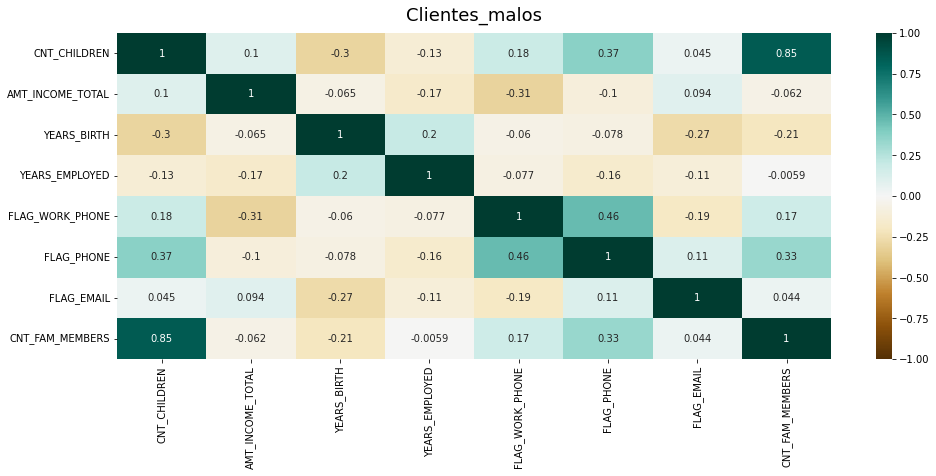

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(s_clientes_malos_1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12)

# plt.savefig('Mobil_Clientes_malos.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Mobil_Clientes_malos.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Mobil_Clientes_malos.png'

# shutil.move(pos1,pos2)

#### Gráficas correlación

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr/Clientes_malos.png'

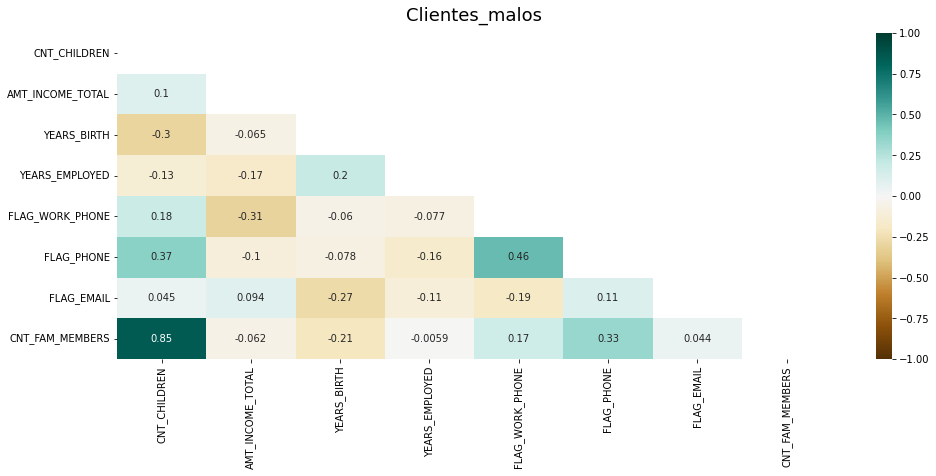

In [12]:
# Gráfica de clientes malos

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr/Clientes_malos.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_VIP.png'

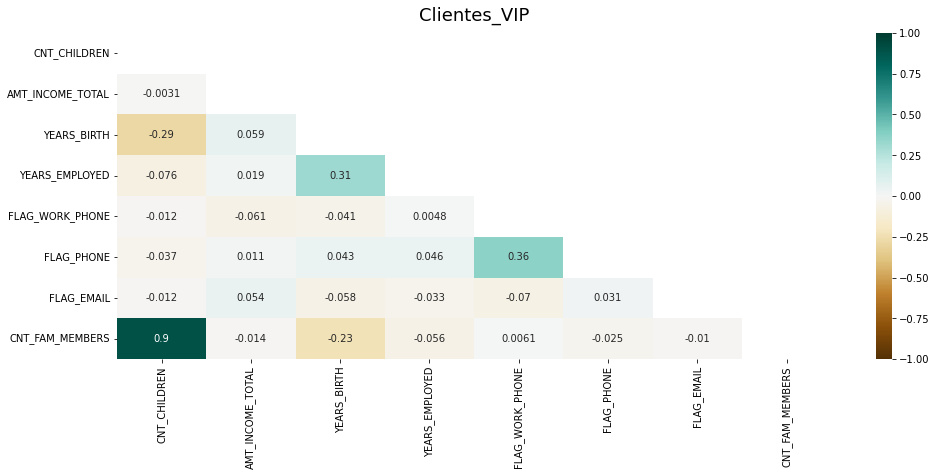

In [13]:
# Gráfica de clientes vip

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_vip_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_vip_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_VIP.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_regulares.png'

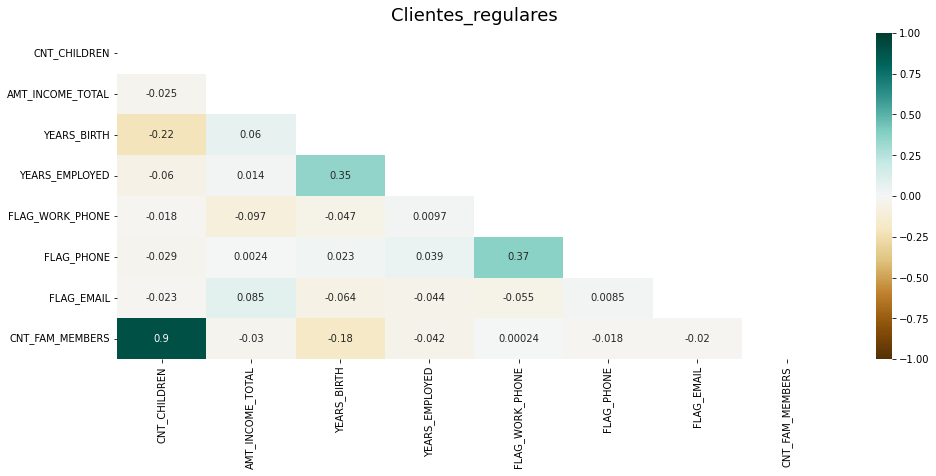

In [14]:
# Gráfica de clientes regulares

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_regulares_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_regulares_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_regulares.png'
shutil.move(pos1,pos2)


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_VIP.png'

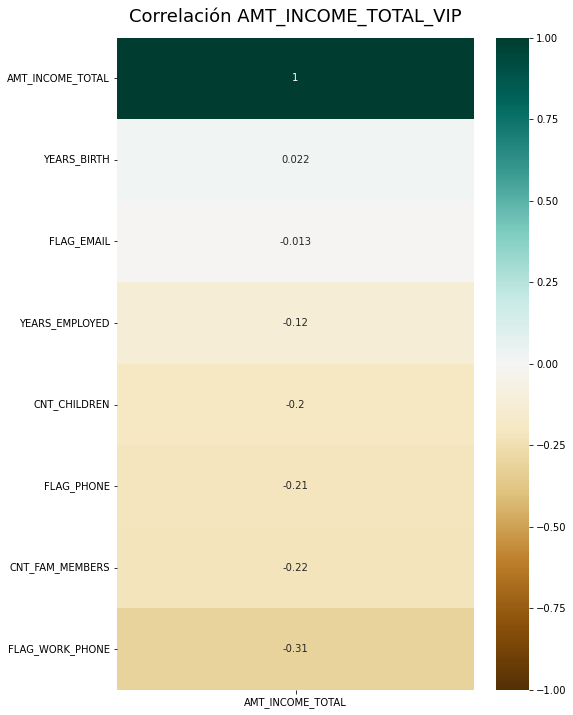

In [15]:
# Correlación por ingresos sin strings

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_VIP.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_malos.png'

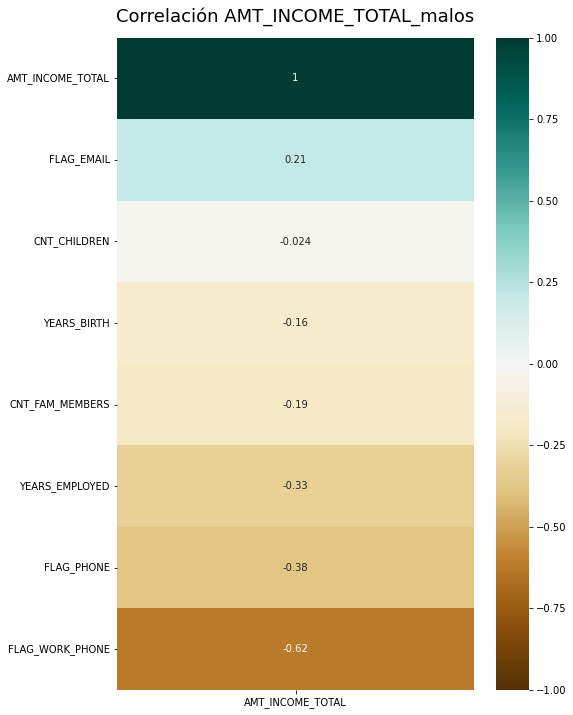

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_malos_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_malos.png'
shutil.move(pos1,pos2)

#### Segunda correlación

In [17]:
# Re-etiquetar valores

# Se dan valores de Code Gender: M = 0 y 1 = F

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_malos_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_malos_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_malos_str.loc[idx,'CODE_GENDER'] = 1

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_regulares_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_regulares_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_regulares_str.loc[idx,'CODE_GENDER'] = 1

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_vip_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_vip_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_vip_str.loc[idx,'CODE_GENDER'] = 1

# Se dan valores de FLAG_OWN_CAR 'Y' = 1 y 'N' = 0

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] = 0

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] = 0

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] = 0


# FLAG_OWN_REALTY. Y = 1 ; N = 0


for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] = 0

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] = 0

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] = 0


# Se dan valores de NAME_INCOME_TYPE 'Working' 1,  'Commercial associate' 2, 'Pensioner' 3 , 'State servant' 4 , 'Student' 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 5

# NAME_EDUCATION_TYPE 'Higher education' = 1 , 'Secondary / secondary special' = 2 , 'Incomplete higher' =3,
#  'Lower secondary' = 4 , 'Academic degree'= 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


# NAME_FAMILY_STATUS Married = 1, Single / not married = 2, Separated = 3, Civil marriage= 4, Widow = 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


# NAME_HOUSING_TYPE:  House / apartment = 1, Rented apartment = 2, With parents = 3, Co-op apartment = 4,
# Municipal apartment = 5, Office apartment = 6

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


# OCCUPATION_TYPE: Cooking staff = 1, Sales staff = 2, Laborers = 3, Managers =4,
# Core staff = 5, High skill tech staff = 6, Medicine staff = 7, Security staff = 8,
# Drivers = 9, Low-skill Laborers = 10, Accountants = 11, Cleaning staff = 12,
# Secretaries = 13, Waiters/barmen staff = 14, IT staff = 15

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 15


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 15


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 15

In [18]:
# Verificador de conversión
df_clientes_malos_str['OCCUPATION_TYPE'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=object)

In [19]:
# Verificador de conversión
df_clientes_malos_str['CODE_GENDER']

0     1
1     1
2     0
3     1
4     1
     ..
91    0
92    1
93    0
94    0
95    0
Name: CODE_GENDER, Length: 83, dtype: object

In [20]:
# Verificador de conversión
df_clientes_malos_str = df_clientes_malos_str.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_str = df_clientes_regulares_str.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_str = df_clientes_vip_str.drop(['FLAG_MOBIL'], axis = 1)

#### Gráficas correlación 2

In [21]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

df_clientes_malos_str = df_clientes_malos_str.corr()
df_clientes_regulares_str = df_clientes_regulares_str.corr()
df_clientes_vip_str = df_clientes_vip_str.corr()

In [22]:
df_clientes_malos_str

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,0.184868,0.368375,0.044766,0.845809
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,-0.311802,-0.104082,0.093540,-0.062004
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,-0.060275,-0.078016,-0.269351,-0.208046
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,-0.077283,-0.158536,-0.112366,-0.005913
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,1.000000,0.463980,-0.190076,0.165239
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,0.463980,1.000000,0.112354,0.328783
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,-0.190076,0.112354,1.000000,0.043848
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,0.165239,0.328783,0.043848,1.000000


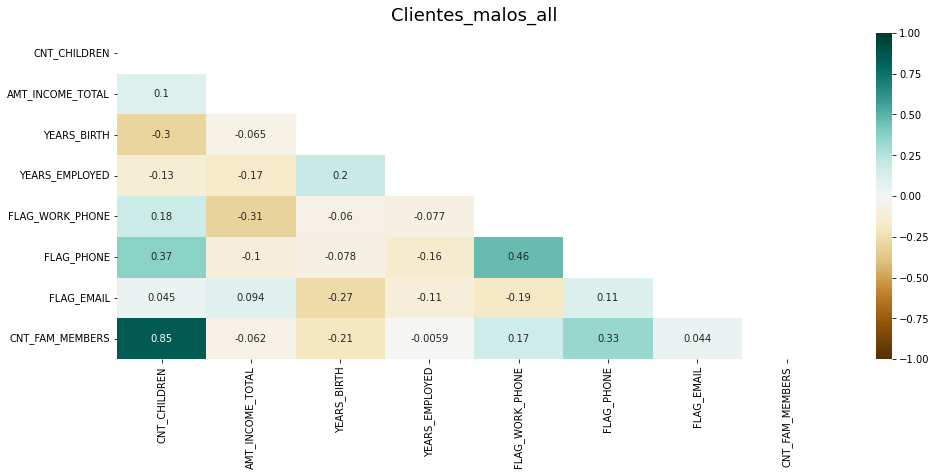

In [23]:
# Gráfica de clientes malos nueva

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_clientes_malos_str, dtype=bool))
heatmap = sns.heatmap(df_clientes_malos_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos_all', fontdict={'fontsize':18}, pad=12);

# plt.savefig('Clientes_malos_all.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos_all.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_malos_all.png'

# shutil.move(pos1,pos2)

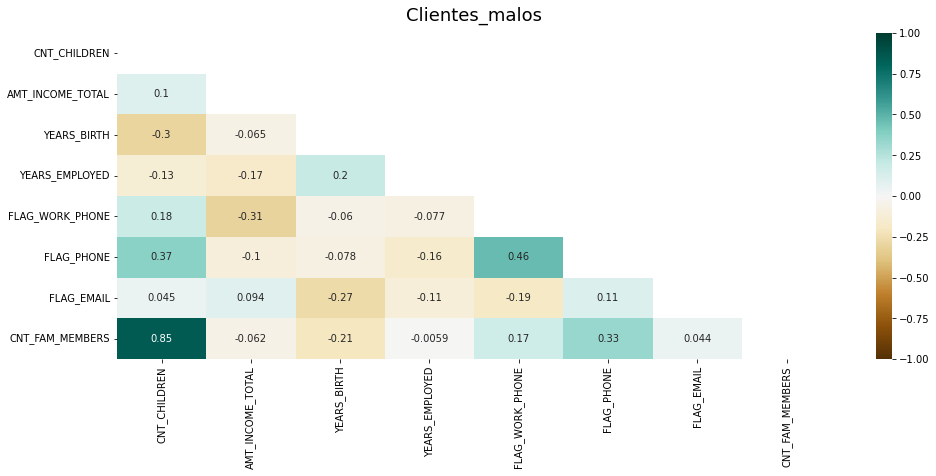

In [24]:
# Gráfica de clientes malos anterior

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12);

# plt.savefig('Clientes_malos.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr/Clientes_malos.png'
# shutil.move(pos1,pos2)

In [25]:
# plt.figure(figsize=(16, 6))
# mask = np.triu(np.ones_like(df_clientes_vip_str, dtype=np.bool))
# heatmap = sns.heatmap(df_clientes_vip_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Clientes_VIP_all', fontdict={'fontsize':18}, pad=12);

# plt.savefig('Clientes_VIP_all.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP_all.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_VIP_all.png'
# shutil.move(pos1,pos2)


In [26]:
# plt.figure(figsize=(16, 6))
# mask = np.triu(np.ones_like(df_clientes_regulares_str, dtype=np.bool))
# heatmap = sns.heatmap(df_clientes_regulares_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Clientes_regulares_all', fontdict={'fontsize':18}, pad=12);

# plt.savefig('Clientes_regulares_all.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares_all.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_regulares_all.png'
# shutil.move(pos1,pos2)

Text(0.5, 1.0, 'Correlación AMT_INCOME_TOTAL_VIP_all')

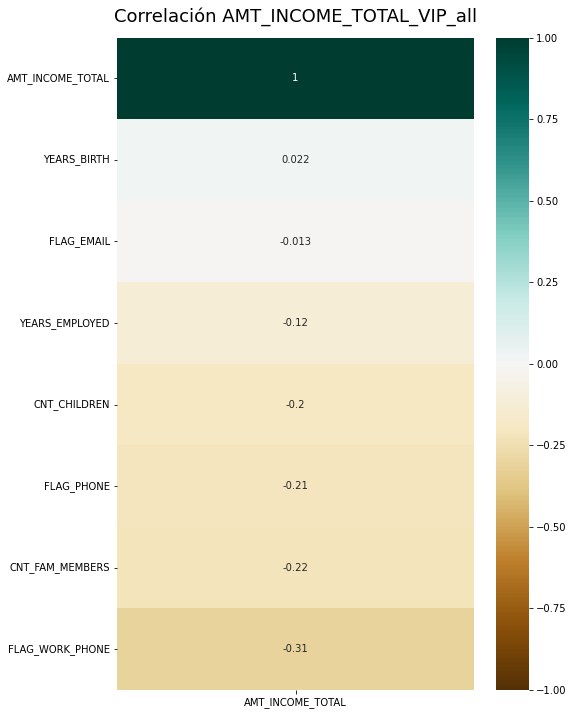

In [27]:
# Correlación por ingresos con strings nueva

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clientes_vip_str.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP_all', fontdict={'fontsize':18}, pad=16)

# plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP_all.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP_all.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_VIP_all.png'
# shutil.move(pos1,pos2)

Text(0.5, 1.0, 'Correlación AMT_INCOME_TOTAL_VIP')

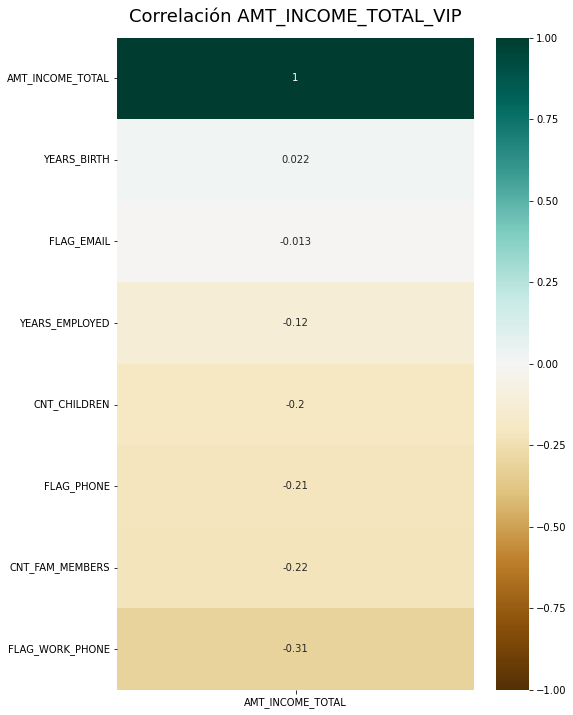

In [28]:
# Correlación por ingresos sin strings anterior

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP', fontdict={'fontsize':18}, pad=16)

# plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_VIP.png'
# shutil.move(pos1,pos2)

In [29]:
# plt.figure(figsize=(8, 12))
# heatmap = sns.heatmap(df_clientes_malos_str.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos_all', fontdict={'fontsize':18}, pad=16);

# plt.savefig('Correlación_AMT_INCOME_TOTAL_malos_all.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos_all.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_malos_all.png'
# shutil.move(pos1,pos2)